# Aprendizado não supervisionado - Agrupamento

## Tarefa

Utilizando a base de dados em anexo, crie um modelo de dados que faça um agrupamento dos países da base de dados com relação a níveis de qualidade de vida nesses países levando em consideração os dados fornecidos. 
Lembre-se de que o algoritmo não sabe do que se tratam os dados, logo cabe a você guiá-lo nesse agrupamento, escolher o que é mais relevante ou não, quais dados utilizar, quais desprezar.

## Avaliação

Qualidade e lógica empregada no projeto
Resultado coerente do agrupamento (clusterização)

## Entrega do trabalho 

Cada integrante do grupo deverá entregar na tarefa do Teams um arquivo de notebook (.ipynb) contendo todo o código desenvolvido (células de código) e explicações de cada passo dado no projeto (células markdown). Caso algum integrante esqueça de entregar sua cópia do trabalho ele poderá ficar sem nota. Importante: todos os integrantes do grupo devem entregar o mesmo trabalho. 

## Grupo 

O trabalho será desenvolvido em grupos de 2 até 4 alunos. O nome dos integrantes deve constar numa célula de markdown no início do trabalho. Respeitem os tamanhos dos grupos. 

## FAQ 

Trabalhos iguais em grupos diferentes: Zero para ambos os grupos. Cuidado com o que vocês compartilham entre si. 

Usei uma IA para fazer os códigos pra mim, por isso ficou igual ao do outro grupo: Zero para ambos os grupos. Usem as IA (GPT e afins) com responsabilidade. Não sai copiando e colando qualquer coisa que eles respondem... Usem a cabeça... 

Achei um desafio do Kagle igualzinho a esse e eu tomei base nele por isso ficou igual ao do meu colega: Novamente, Não sai copiando e colando qualquer coisa que vocês acharem... Use trabalhos prontos como inspiração, não como resolução.

Segui um tutorial do YouTube, por isso ficou igual ao do outro grupo: Zero

Trabalho encontrado na internet igual ao do grupo: Zero

## Grupo

- Murilo Ramalho da Mata
- Camila Gomes da Silva Casa

---

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 10.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.0 MB 10.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.0 MB 9.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 8.0 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.0 MB 7.8 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.0 MB 7.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/8.0 MB 6.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/8.0 MB 6.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/8.0 MB 6.0 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Passo 1: Importar bibliotecas necessárias

Importamos as bibliotecas que serão utilizadas para manipulação de dados (pandas e numpy), escalonamento (StandardScaler), clusterização (KMeans) e visualização (matplotlib e seaborn).

#### Passo 2: Carregar os dados

Carregamos o arquivo CSV contendo os dados dos países. Visualizamos as primeiras linhas do dataframe para garantir que os dados foram carregados corretamente.

#### Passo 3: Tratar valores ausentes (se houver)

Verificamos se há valores ausentes no dataframe. Se houver, podemos decidir entre preencher ou remover os valores ausentes.

#### Passo 4: Seleção de atributos e escalonamento

Selecionamos os atributos relevantes para a análise e removemos a coluna `country` que não será utilizada na clusterização. Em seguida, escalamos os dados para garantir que todos os atributos estejam na mesma escala.

#### Passo 5: Determinar o número ideal de clusters

Utilizamos o método do cotovelo (Elbow Method) para determinar o número ideal de clusters. Calculamos o SSE (Soma dos Quadrados dos Erros) para diferentes valores de k e visualizamos o gráfico do método do cotovelo.

#### Passo 6: Aplicar K-means com o número ideal de clusters

Aplicamos o algoritmo K-means com o número de clusters escolhido com base no método do cotovelo. Adicionamos a coluna `Cluster` ao dataframe original para indicar a qual cluster cada país pertence.

#### Passo 7: Avaliação e Visualização

Visualizamos os clusters formados em um gráfico de dispersão utilizando dois dos atributos mais relevantes (renda e expectativa de vida). Também mostramos algumas estatísticas dos clusters para entender melhor as características de cada grupo.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Country-data.csv')

print(data.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [6]:
print(data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [12]:
X = data.drop(columns=['country'])

X = X.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

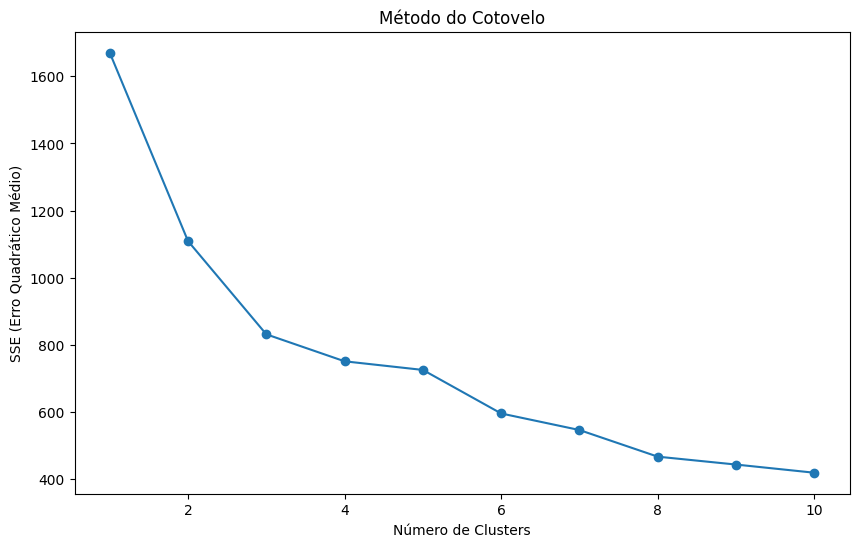

In [13]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Erro Quadrático Médio)')
plt.title('Método do Cotovelo')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

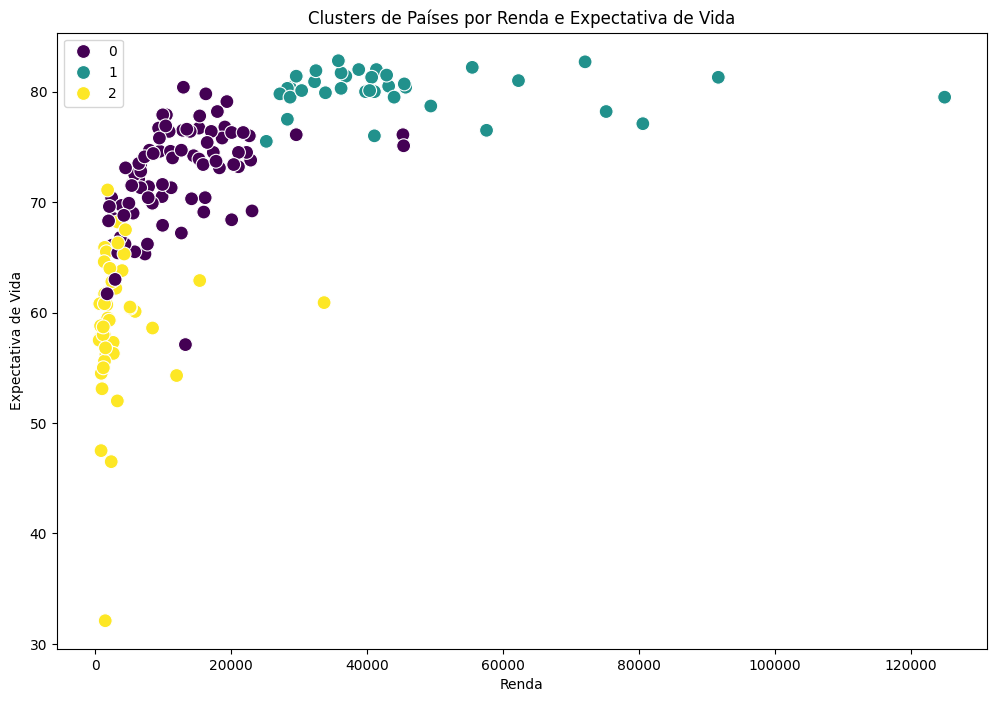

         country  child_mort    exports    health    imports        income  \
Cluster                                                                      
0            NaN   22.456977  40.273128  6.251047  47.362394  12321.744186   
1            NaN    5.000000  58.738889  8.807778  51.491667  45672.222222   
2            NaN   95.106667  28.602444  6.301111  42.306667   3539.844444   

         inflation  life_expec  total_fer          gdpp  
Cluster                                                  
0         7.720884   72.566279   2.340349   6461.767442  
1         2.671250   80.127778   1.752778  42494.444444  
2        11.986778   59.055556   5.065333   1766.711111  


In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='income', y='life_expec', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de Países por Renda e Expectativa de Vida')
plt.xlabel('Renda')
plt.ylabel('Expectativa de Vida')
plt.legend()
plt.show()

data = data.apply(pd.to_numeric, errors='coerce')

print(data.groupby('Cluster').mean())

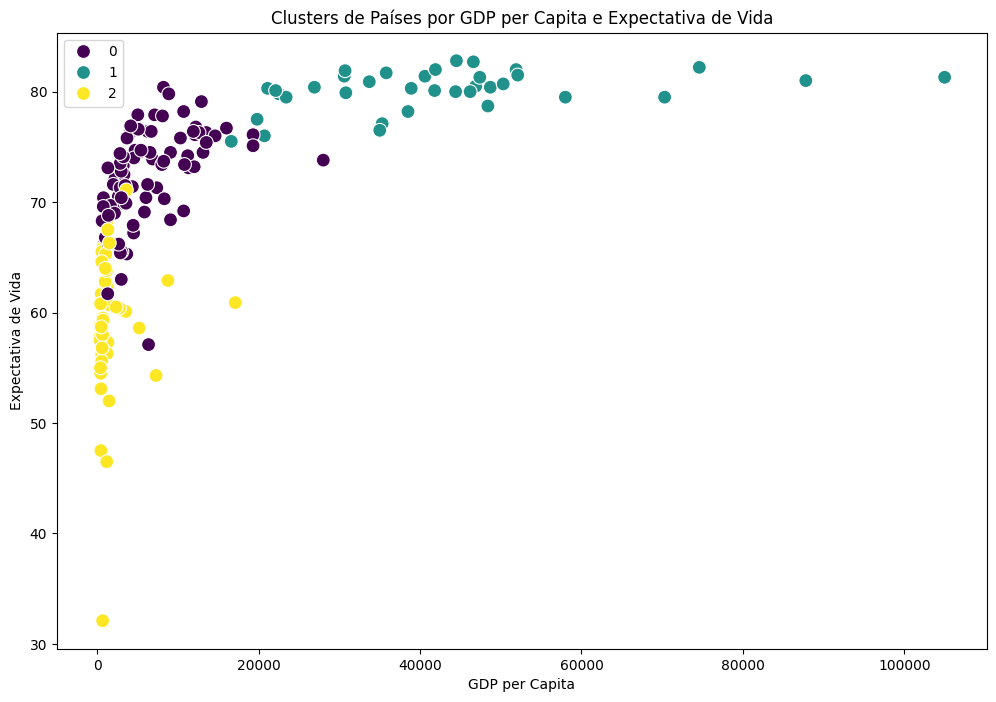

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='gdpp', y='life_expec', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de Países por GDP per Capita e Expectativa de Vida')
plt.xlabel('GDP per Capita')
plt.ylabel('Expectativa de Vida')
plt.legend()
plt.show()

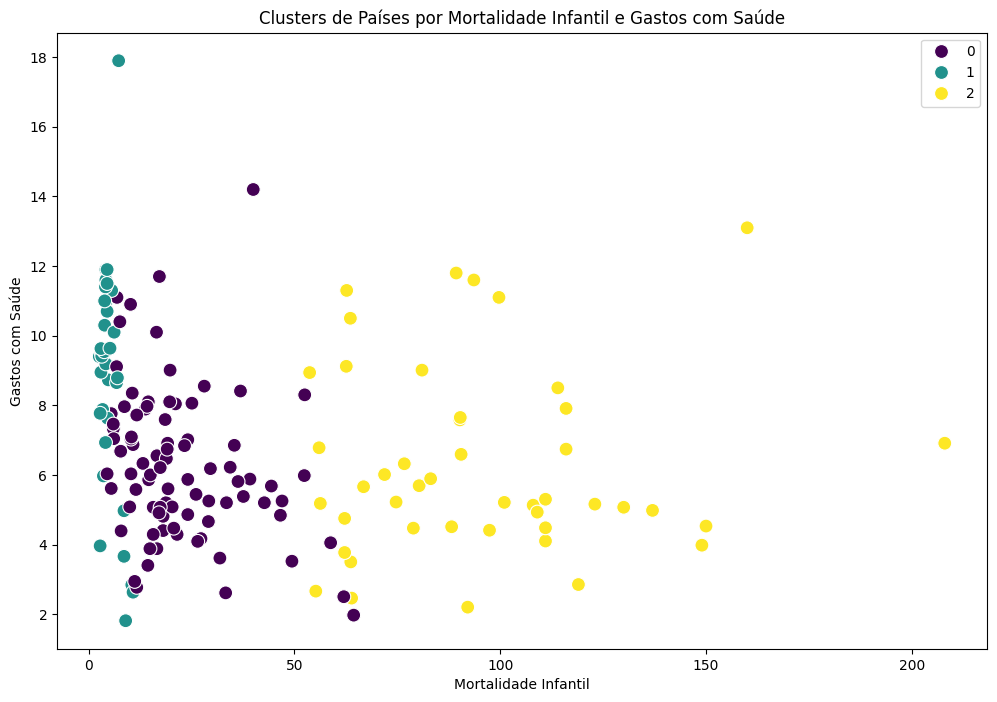

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='child_mort', y='health', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de Países por Mortalidade Infantil e Gastos com Saúde')
plt.xlabel('Mortalidade Infantil')
plt.ylabel('Gastos com Saúde')
plt.legend()
plt.show()

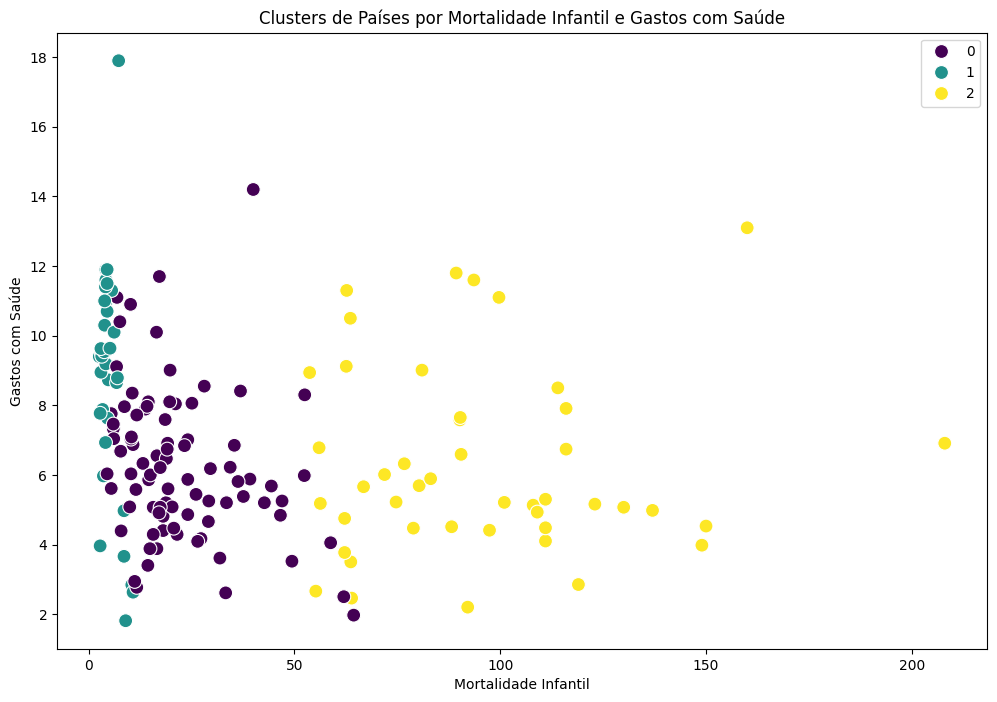

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='child_mort', y='health', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de Países por Mortalidade Infantil e Gastos com Saúde')
plt.xlabel('Mortalidade Infantil')
plt.ylabel('Gastos com Saúde')
plt.legend()
plt.show()